# MID CP KNN

This notebook is for **CVPR** Mid Term Assignment 1 solve


## Dataset and Preprocessing

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile
from tqdm import tqdm

In [ ]:
dataset_url = "https://github.com/YoongiKim/CIFAR-10-images/archive/refs/heads/master.zip"
downloaded_file = "dataset.zip"

if not os.path.exists(downloaded_file):
    response = requests.get(dataset_url, stream=True)
    total_size = int(response.headers.get('content-length', 0))

    with open(downloaded_file, "wb") as f, tqdm(
        unit="B", unit_scale=True, unit_divisor=1024, total=total_size
    ) as pbar:
        for data in response.iter_content(chunk_size=1024):
            f.write(data)
            pbar.update(len(data))

    print("Dataset downloaded successfully.")

    with zipfile.ZipFile(downloaded_file, "r") as zip_ref:
        zip_ref.extractall("unpacked_dataset")  # Replace with the desired folder name
    print("Dataset unzipped.")
else:
    print("Dataset already exists. No need to download again.")

53.2MB [00:03, 17.4MB/s]


Dataset downloaded successfully.
Dataset unzipped.


In [ ]:
TEST_DIR = 'unpacked_dataset/CIFAR-10-images-master/test'
TRAIN_DIR = 'unpacked_dataset/CIFAR-10-images-master/train'

CATEGORIES = [entry.name for entry in os.scandir(TEST_DIR) if entry.is_dir()]
print(CATEGORIES)


['automobile', 'ship', 'cat', 'airplane', 'frog', 'deer', 'dog', 'bird', 'horse', 'truck']


In [ ]:
TRAIN_DATA = []

for category in CATEGORIES:
    category_path = os.path.join(TEST_DIR, category)
    class_index = CATEGORIES.index(category)

    for image_file in tqdm(os.listdir(category_path)):
        image_path = os.path.join(category_path, image_file)
        image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        TRAIN_DATA.append([image_array, class_index])

print("Appending the images to the image array done")

100%|██████████| 1000/1000 [00:00<00:00, 19473.07it/s]

Appending the images to the image array done


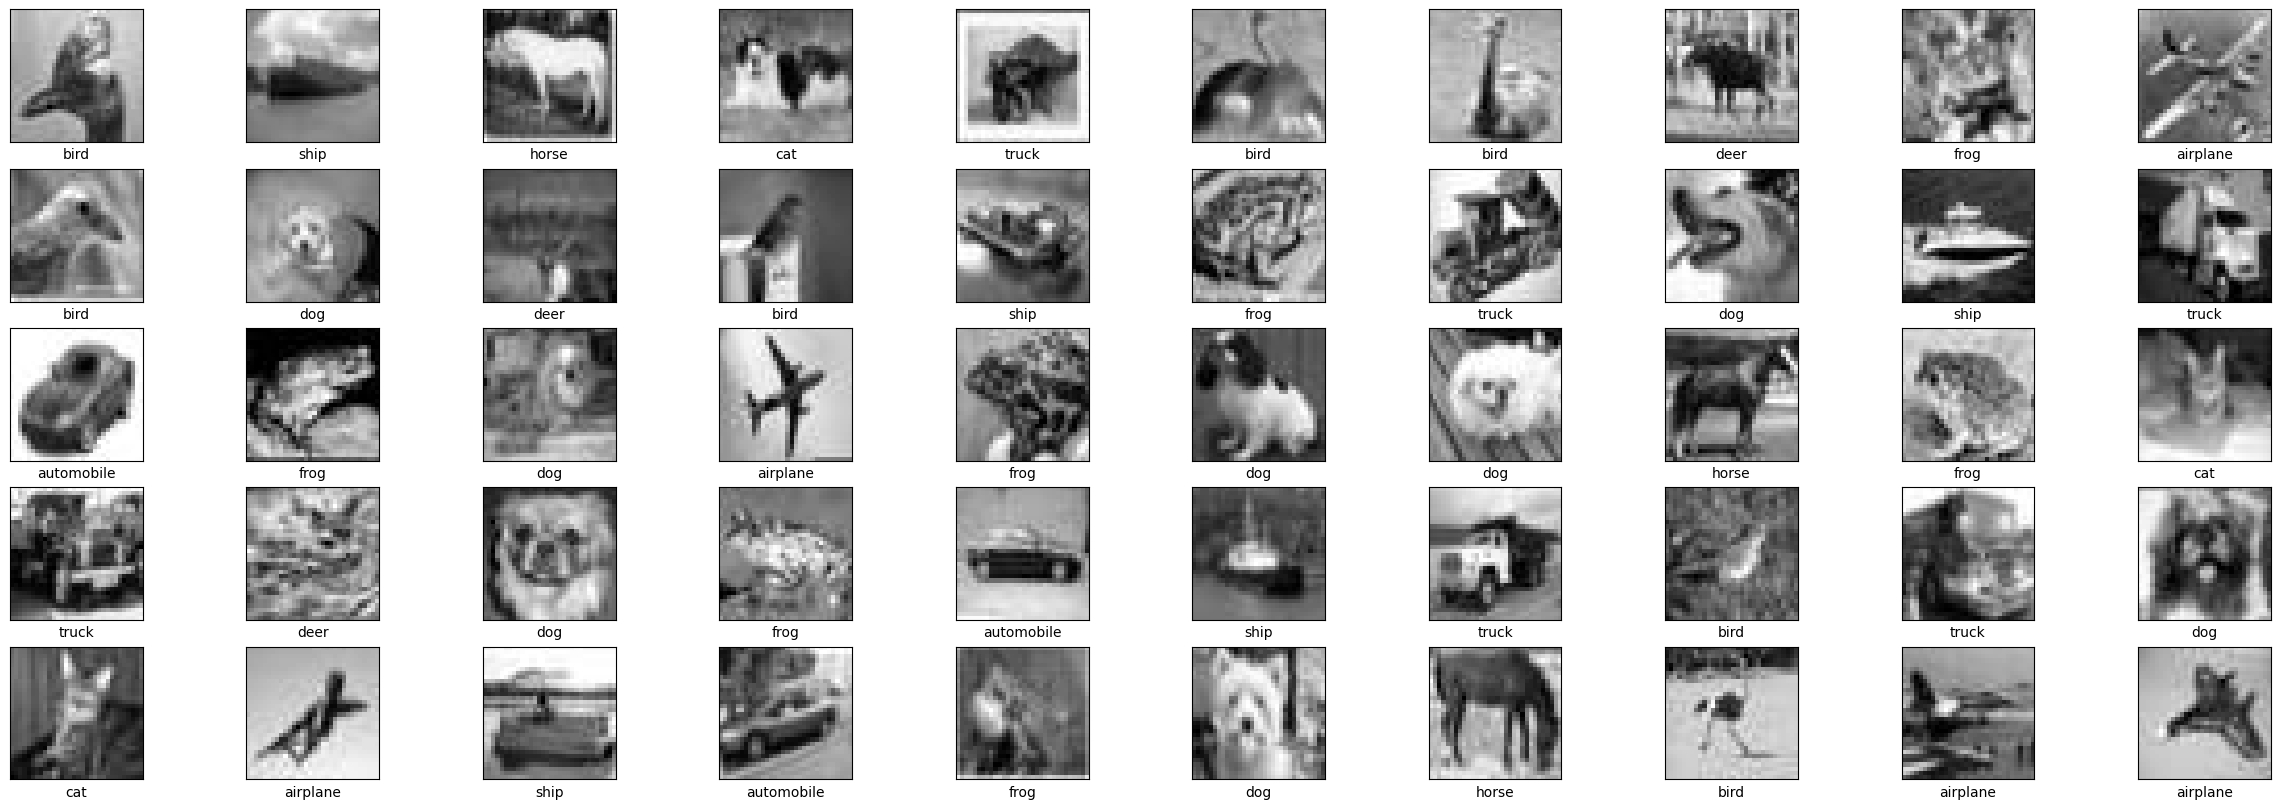

In [ ]:
## Randomizing the data
random.shuffle(TRAIN_DATA)


# Plotting the first 50 images
plt.figure(figsize=(30, 10))
for i, (image, class_index) in enumerate(TRAIN_DATA[:50]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.xlabel(CATEGORIES[class_index])
    plt.xticks([])
    plt.yticks([])

plt.show()

## Model Building & Evalution

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the dataset into 5 folds
fold_size = len(TRAIN_DATA) // 5
folds = [TRAIN_DATA[i * fold_size: (i + 1) * fold_size] for i in range(5)]

## Result & Analysis

Fold 1, k = 1, L1 accuracy = 24.65%, L2 accuracy = 23.05%
Fold 1, k = 3, L1 accuracy = 24.45%, L2 accuracy = 21.65%
Fold 1, k = 5, L1 accuracy = 26.35%, L2 accuracy = 22.85%
Fold 1, k = 7, L1 accuracy = 25.20%, L2 accuracy = 22.70%
Fold 1, k = 9, L1 accuracy = 25.30%, L2 accuracy = 23.15%


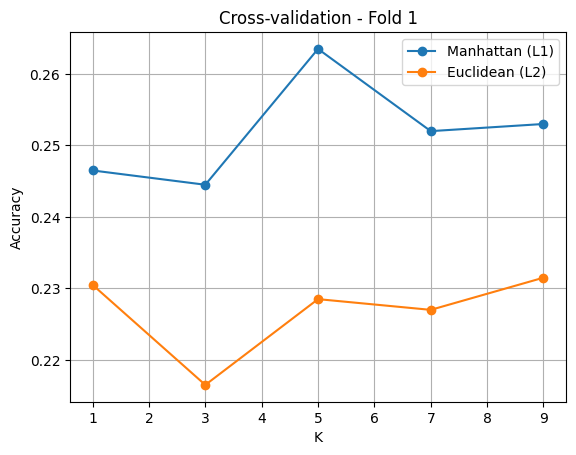

Fold 2, k = 1, L1 accuracy = 26.15%, L2 accuracy = 24.20%
Fold 2, k = 3, L1 accuracy = 26.05%, L2 accuracy = 24.40%
Fold 2, k = 5, L1 accuracy = 28.40%, L2 accuracy = 25.95%
Fold 2, k = 7, L1 accuracy = 27.70%, L2 accuracy = 25.90%
Fold 2, k = 9, L1 accuracy = 28.20%, L2 accuracy = 26.10%


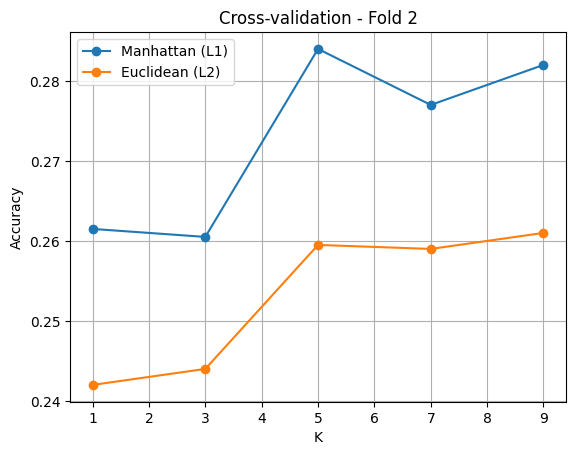

Fold 3, k = 1, L1 accuracy = 25.80%, L2 accuracy = 24.75%
Fold 3, k = 3, L1 accuracy = 25.35%, L2 accuracy = 23.60%
Fold 3, k = 5, L1 accuracy = 26.55%, L2 accuracy = 24.55%
Fold 3, k = 7, L1 accuracy = 26.80%, L2 accuracy = 23.60%
Fold 3, k = 9, L1 accuracy = 26.80%, L2 accuracy = 23.55%


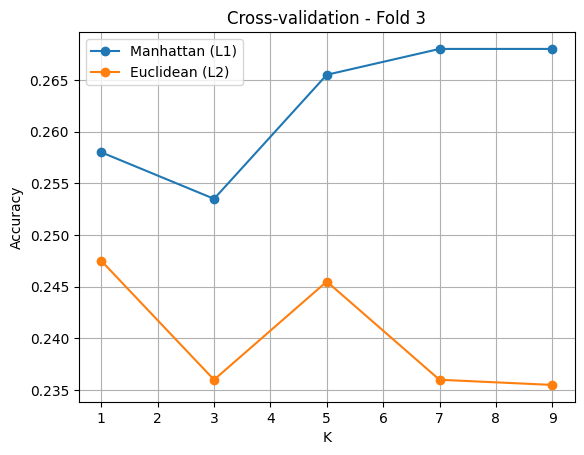

Fold 4, k = 1, L1 accuracy = 25.15%, L2 accuracy = 23.80%
Fold 4, k = 3, L1 accuracy = 25.10%, L2 accuracy = 23.20%
Fold 4, k = 5, L1 accuracy = 25.40%, L2 accuracy = 24.05%
Fold 4, k = 7, L1 accuracy = 26.05%, L2 accuracy = 24.45%
Fold 4, k = 9, L1 accuracy = 26.20%, L2 accuracy = 24.25%


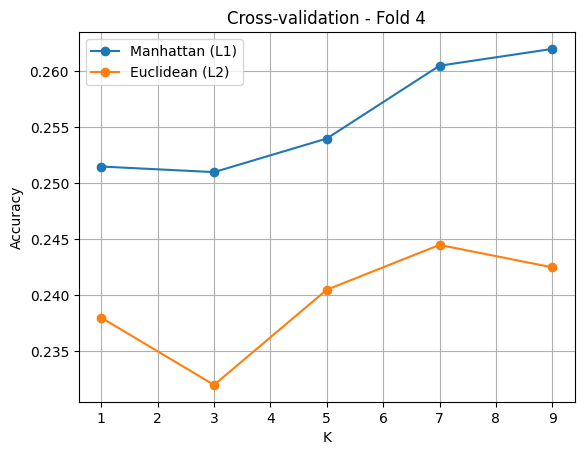

Fold 5, k = 1, L1 accuracy = 25.20%, L2 accuracy = 23.55%
Fold 5, k = 3, L1 accuracy = 24.25%, L2 accuracy = 24.15%
Fold 5, k = 5, L1 accuracy = 26.05%, L2 accuracy = 25.50%
Fold 5, k = 7, L1 accuracy = 26.20%, L2 accuracy = 24.35%
Fold 5, k = 9, L1 accuracy = 26.35%, L2 accuracy = 24.15%


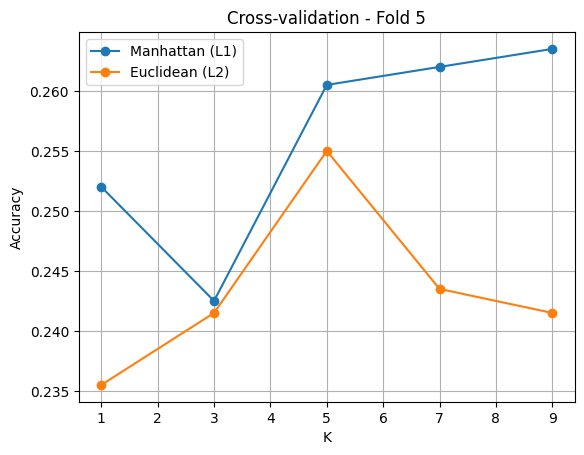

In [13]:
def plot_accuracies(fold, k_values, l1_accuracies, l2_accuracies):
    best_k_l1 = k_values[l1_accuracies.index(max(l1_accuracies))]
    best_accuracy_l1 = max(l1_accuracies)
    best_k_l2 = k_values[l2_accuracies.index(max(l2_accuracies))]
    best_accuracy_l2 = max(l2_accuracies)

    plt.plot(k_values, l1_accuracies, marker='o', label='Manhattan (L1)')
    plt.plot(k_values, l2_accuracies, marker='o', label='Euclidean (L2)')
    plt.title(f"Cross-validation - Fold {fold}")
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

k_values = [1, 3, 5, 7, 9]

for fold, validation in enumerate(folds):
    train = [item for i, data in enumerate(folds) if i != fold for item in data]
    l1_accuracies = []
    l2_accuracies = []

    for k in k_values:
        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        train_data = [item[0].reshape(-1) for item in train]  # Reshape each image to 1D
        knn_l1.fit(train_data, [item[1] for item in train])
        knn_l2.fit(train_data, [item[1] for item in train])

        l1_predictions = knn_l1.predict([item[0].reshape(-1) for item in validation])
        l2_predictions = knn_l2.predict([item[0].reshape(-1) for item in validation])

        l1_accuracy = accuracy_score([item[1] for item in validation], l1_predictions)
        l2_accuracy = accuracy_score([item[1] for item in validation], l2_predictions)

        l1_accuracies.append(l1_accuracy)
        l2_accuracies.append(l2_accuracy)

        print(f"Fold {fold + 1}, k = {k}, L1 accuracy = {l1_accuracy * 100:.2f}%, L2 accuracy = {l2_accuracy * 100:.2f}%")

    plot_accuracies(fold + 1, k_values, l1_accuracies, l2_accuracies)

## Top 5 Predictions:


In [ ]:
# Define a function to predict the top 5 class labels for a test image
def predict_top5(test_image_path, model, k_values):
    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)

    if test_image is not None:
        test_data = test_image.reshape(-1)

        top5_predictions = []

        for k in k_values:
            predictions = model.kneighbors([test_data], n_neighbors=k, return_distance=False)[0]
            top5_labels = [CATEGORIES[item] for item in predictions]
            top5_predictions.append(top5_labels)

        return top5_predictions
    else:
        print(f"Failed to load the image at {test_image_path}")
        return None


# Predict and print the top 5 predictions for each test image
for test_image_path in TEST_DIR:
  top5_predictions = predict_top5(test_image_path, knn_best, k_values)
  if top5_predictions is not None:
    print(f"Top 5 predictions for {os.path.basename(test_image_path)}: {top5_predictions}")
